# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [1]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

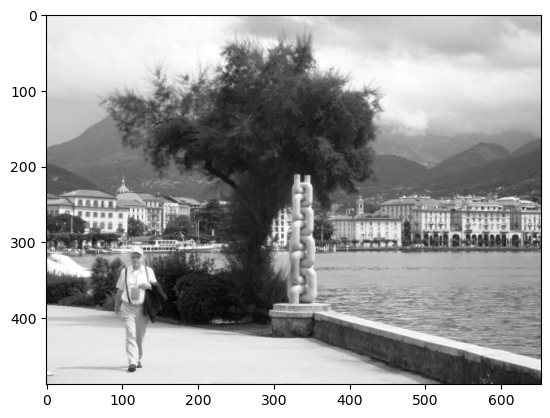

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [3]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

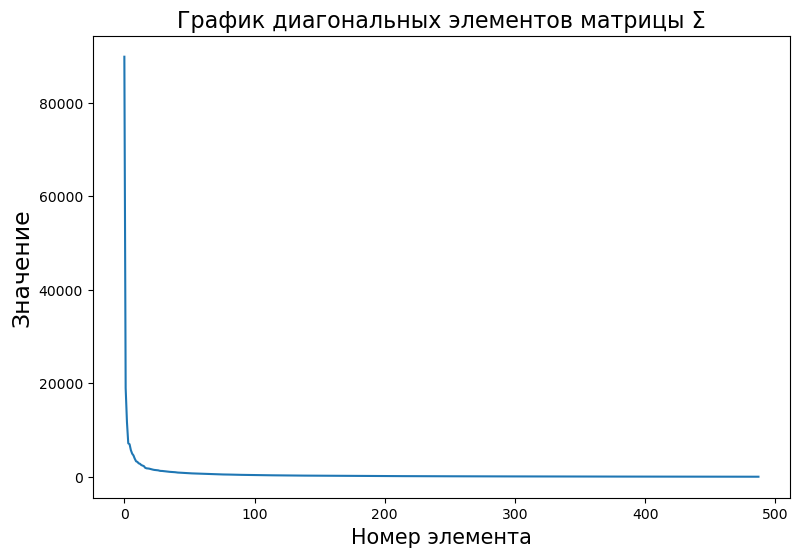

In [4]:
plt.figure(figsize = (9, 6))
plt.plot(S)
plt.title('График диагональных элементов матрицы Σ', fontsize=16)

plt.xlabel('Номер элемента', fontsize=15)
plt.ylabel('Значение', fontsize=17)

plt.show()

Убывание настолько быстрое, что большую часть графика просто сплющило. Нарисуем график логарифма.

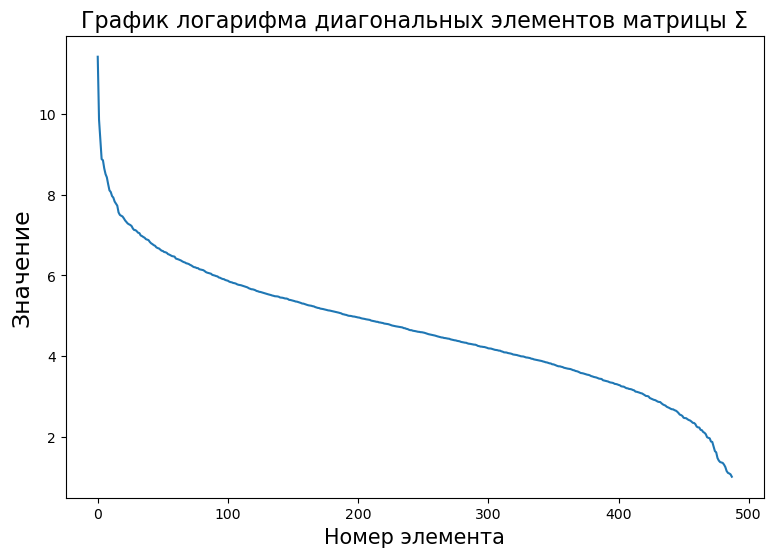

In [5]:
plt.figure(figsize = (9, 6))
plt.plot(np.log(S))
plt.title('График логарифма диагональных элементов матрицы Σ', fontsize=16)

plt.xlabel('Номер элемента', fontsize=15)
plt.ylabel('Значение', fontsize=17)

plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

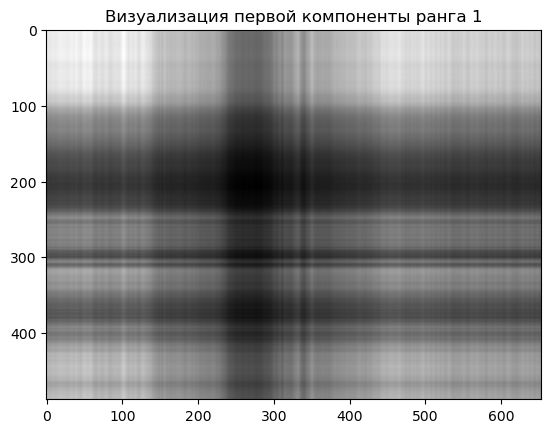

In [6]:
S_diag = np.diag(S)
def SVD_based_reduction(start, end):
    new_image = U[:, start:end]@S_diag[start:end, start:end]@VT[start:end, ]
    return new_image

plt.title("Визуализация первой компоненты ранга 1")
imgplot = plt.imshow(SVD_based_reduction(0, 1), cmap='gray')

Такой эффект был ожидаем: при перемножении мы получаем матрицу ранга 1 из тензорного определения ранга: (𝜎1 - скаляр)* Первая строка U * Первый столбцец VT.

Поэтому в данной матрице любые 2 столбца или строки линейно зависимы(т. к. максимальное число линейно независимых строк и число линейно независимых столбцов равно 2): значит, все строки получаются из некоторой строки умножением на скаляр и все столбцы получаются из некоторого столбца умножением на скаляр, откуда и возникает клетчатая структура.

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

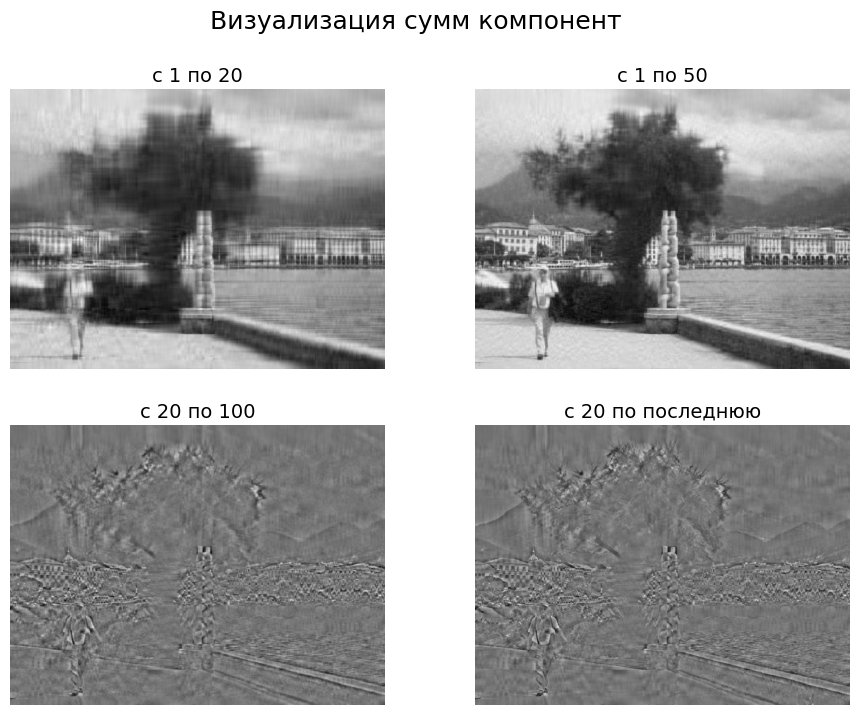

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(11, 8))
fig.suptitle("Визуализация сумм компонент", fontsize = 18)

axes[0, 0]
axes[0, 0].title.set_text("c 1 по 20")
axes[0, 0].title.set_fontsize(14)
axes[0, 0].imshow(SVD_based_reduction(0, 20), cmap='gray')
axes[0, 0].axis('off')

axes[0, 1]
axes[0, 1].title.set_text("c 1 по 50")
axes[0, 1].title.set_fontsize(14)
axes[0, 1].imshow(SVD_based_reduction(0, 50), cmap='gray')
axes[0, 1].axis('off')

axes[1, 0]
axes[1, 0].title.set_text("c 20 по 100")
axes[1, 0].title.set_fontsize(14)
axes[1, 0].imshow(SVD_based_reduction(19, 100), cmap='gray')
axes[1, 0].axis('off')

axes[1, 1]
axes[1, 1].title.set_text("c 20 по последнюю")
axes[1, 1].title.set_fontsize(14)
axes[1, 1].imshow(SVD_based_reduction(19, S.size), cmap='gray')
axes[1, 1].axis('off')


plt.show()

Вывод: ключевая информация о матрице находится в первых компонентах, лучшее k-ранговое приближение матрицы A образуют ее первые k компонент.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

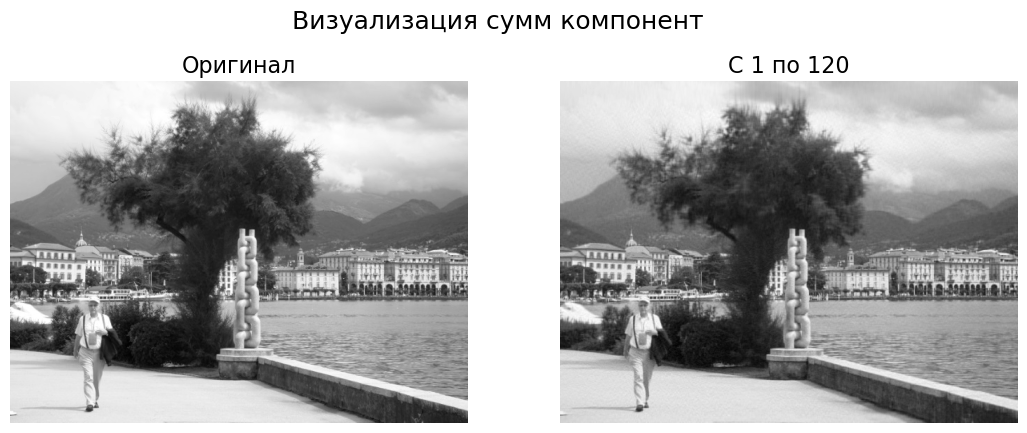

In [8]:
plt.figure(figsize=(13, 5))
plt.suptitle("Визуализация сумм компонент", fontsize = 18)

plt.subplot(1, 2, 1)
plt.title('Оригинал', fontsize = 16)
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title('С 1 по 120', fontsize = 16)
plt.imshow(SVD_based_reduction(0, 120), cmap='gray')
plt.axis("off")

plt.show()

В рамках курса линейной алгебры было доказано, что лучшее k-ранговое приближение (относительно нормы Фробениуса)  матрицы A образуют первые k компонент ее SVD-разложения, а значение ошибки при нем равно среднеквадратическому 𝜎i по i на [k+1; rank(A)](утверждение 260 конспекта 2021-2022 г.).

Вычислим, наскольку уменьшается ошибка при переходе от оптимальных k-рангового к k+1-ранговому приближению для k начиная с 15(т. к. ошибка на первых k слишком велика, масштаб графика искажается и он становится менее читаемым)

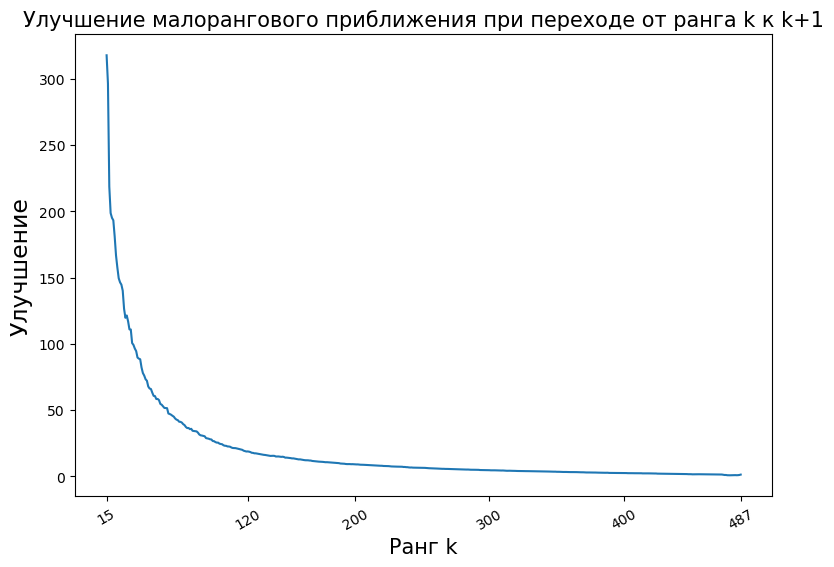

In [9]:
mistake = ((np.cumsum(S[::-1]**2))**0.5)
mistake_diff = np.diff(mistake)[::-1]

plt.figure(figsize = (9, 6))
plt.plot(mistake_diff[14:])
plt.title('Улучшение малорангового приближения при переходе от ранга k к k+1', fontsize=15)

plt.xlabel('Ранг k', fontsize=15)
plt.ylabel('Улучшение', fontsize=17)

start = 15
plt_labels = np.array([start, 120, 200, 300, 400, S.size-1])
plt.xticks(ticks = plt_labels - np.full(plt_labels.size, start), labels = plt_labels,
           fontsize=10,
           rotation=30)

plt.show()

Мы видим, что функция улучшения качества выглядит как гиперболическая: сначала она убывает стремительно, затем очень медленно, практически стабилизируясь. 

Когда ранг увеличивается на 1 при низких значениях k([1, 100]), в изображение вносится новая информация: объекты, паттерны, детали. Но при росте ранга на каком-то этапе приближение повторяет оригинал с точностью до едва заметных/незаметных элементов(например, в оригинале цвет пикселя был (255, 0, 0), в малоранговом приближении он стал (253, 1, 2)), и дальнейшее наращивание рангов лишь вносит незначимые корректировки в такие элементы. При этом, было бы логично предположить, что увеличение ранга на 1 не позволяет массово корректировать неточности, так как они рассредотачиваются по всему изображению. Именно поэтому при высоких k(начиная с 170) увеличение ранга на 1 можно воспринимать как ликвидацию одной из неточностей, равноценных между собой: поэтому уменьшение ошибки при данных k практически стабилизируется.

Значение 120 выступает при этом как условная грань между двумя частями функции, соответствующих содержательным и незначимым изменениям, и поэтому 120-ранговое приближение уже имеет хорошее качество т.к. вся значимая информация в изображение при данном ранге уже внесена.


**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

Воспользуемся формулами оценки памяти в предисловии к работе(каждое число будем считать за 1 условную единицу памяти): 

r = 120;

m = 488;

n = 653;

Размер исходного изображения: m * n = 318664

Размер 120-рангового приближения: r*(m + n + 1) = 137040

Выгода в 318664/137040 ≈ 2,325 раза налицо!

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [10]:
import sys
print("Размер исходного изображения: ", end = "")
image_size = sys.getsizeof(img)
print(image_size)

print("Размер 120-рангового приближения изображения: ", end = "")
approximation_size = sys.getsizeof(U[:, 0:120].astype(np.float64)) + sys.getsizeof(S[0:120].astype(np.float64)) + sys.getsizeof(VT[0:120, ].astype(np.float64))
print(approximation_size)

print("Низкоранговое приближение требует в " + str(image_size/approximation_size) + " раз меньше памяти.")
print("После приведения чисел в массивах к единому типу данных теоретические наблюдения полностью подтверждаются. Наши расчеты точно описывают потребление памяти.")

Размер исходного изображения: 2549440
Размер 120-рангового приближения изображения: 1096688
Низкоранговое приближение требует в 2.3246721036429685 раз меньше памяти.
После приведения чисел в массивах к единому типу данных теоретические наблюдения полностью подтверждаются. Наши расчеты точно описывают потребление памяти.


### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

Задачи 2.1 - 2.4: https://drive.google.com/file/d/11BREftLVgx_LTm5ze3X57lUXKJ9Q50hi/view?usp=sharing

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.


╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


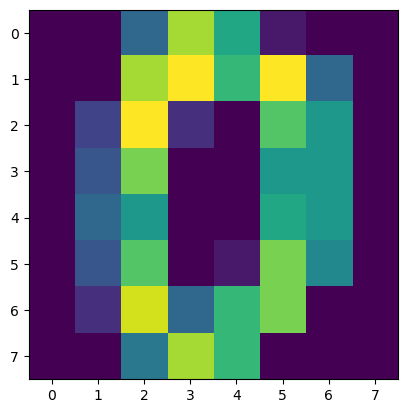

In [57]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [60]:
from numpy.linalg import svd

U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

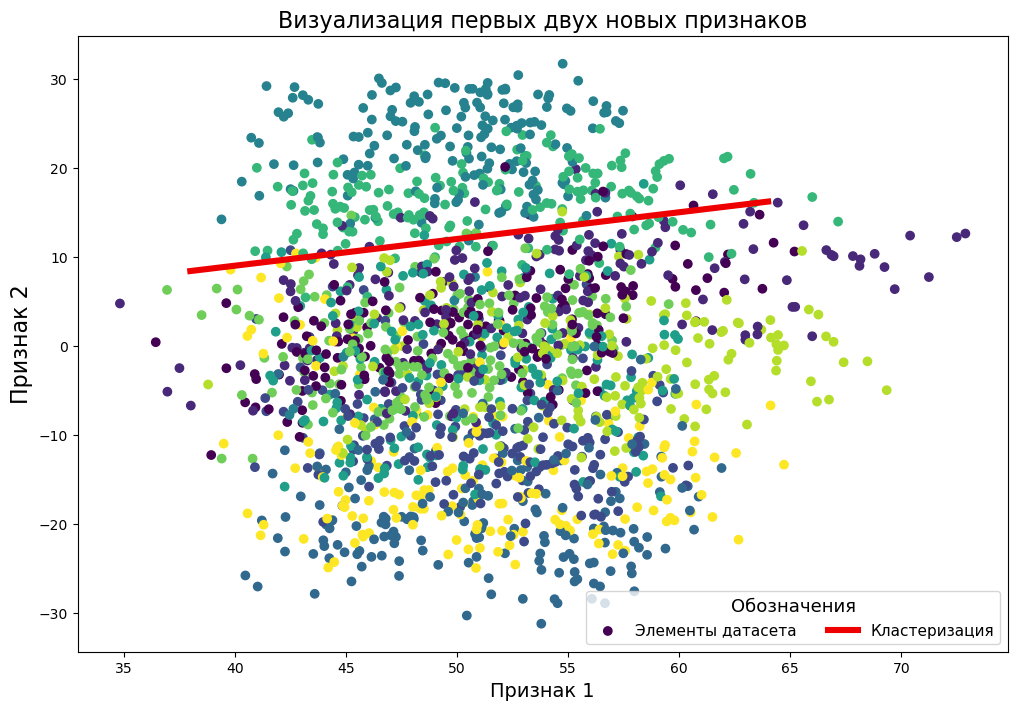

In [61]:
new_features = (U@np.diag(S))[:, :2]
plt.figure(figsize = (12, 8))
plt.title("Визуализация первых двух новых признаков", fontsize = 16)
plt.scatter(x = new_features[:, [0]], y = new_features[:, [1]], c = digits.target)

clasterisation_func = np.poly1d([0.3, -3])
line_graph_x = np.linspace(38, 64, 80)
plt.plot(line_graph_x, clasterisation_func(line_graph_x), c = "#ee0000", linewidth=4.4, linestyle = "-")
plt.xlabel('Признак 1', fontsize=14)
plt.ylabel('Признак 2', fontsize=16)

plt.legend(title='Обозначения', labels = ["Элементы датасета", "Кластеризация"], title_fontsize=13, fontsize=11, ncol=2, loc='lower right')

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

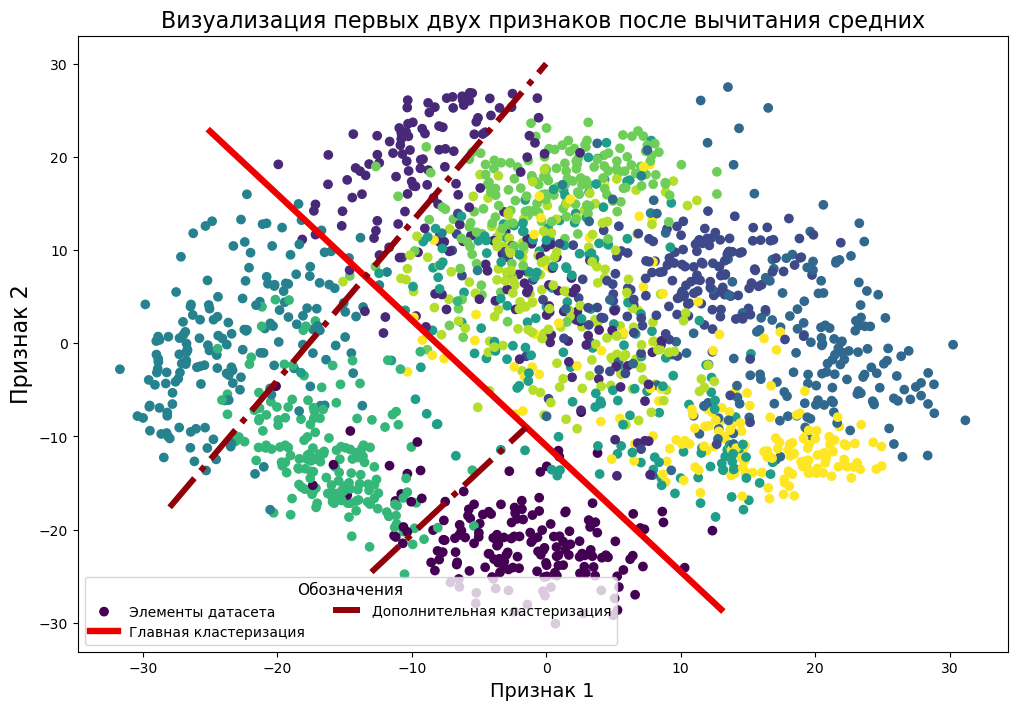

In [62]:
from matplotlib.colors import LogNorm 
feature_means_matrix = np.repeat(np.mean(digits.data, axis = 0)[np.newaxis], digits.data.shape[0], axis = 0)
mean_differed_digits = digits.data - feature_means_matrix
U, S, VT = svd(mean_differed_digits, full_matrices=False)

new_features = (U@np.diag(S))[:, :2]
plt.figure(figsize = (12, 8))
plt.title("Визуализация первых двух признаков после вычитания средних", fontsize = 16)
plt.scatter(x = new_features[:, [0]], y = new_features[:, [1]], c = digits.target)

clasterisation_func = np.poly1d([-1.35, -11])
line_graph_x = np.linspace(-25, 13, 80)
plt.plot(line_graph_x, clasterisation_func(line_graph_x), c = "#ee0000", linewidth=4.6, linestyle = "-")

clasterisation_func2 = np.poly1d([1.35, -7])
line_graph2_x = np.linspace(-13, -1.5, 80)
plt.plot(line_graph2_x, clasterisation_func2(line_graph2_x), c = "#92000a", linewidth=4.3, linestyle = "-.")

clasterisation_func3 = np.poly1d([1.7, 30])
line_graph3_x = np.linspace(-28, 0, 100)
plt.plot(line_graph3_x, clasterisation_func3(line_graph3_x), c = "#92000a", linewidth=4.3, linestyle = "-.")

plt.xlabel('Признак 1', fontsize=14)
plt.ylabel('Признак 2', fontsize=16)

plt.legend(title='Обозначения', labels = ["Элементы датасета", "Главная кластеризация", "Дополнительная кластеризация"], title_fontsize=11, fontsize=10, ncol=2, loc='lower left')

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

Вторая визуализация куда лучше поддается сегментации признаков: мы можем с очень высокой точностью разделить 2 группы цифр вдоль прямой главной кластеризации, кроме того, ряд классов цифр(прежде всего, по нижнюю сторону прямой главной кластеризации), достаточно четко отделяются от остальных(отмечены как дополнительная кластеризация).

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

Принцип работы случайных гауссовских проекций - приблизительное сохранение расстояния между точками при уменьшении ранга (числа признаков).

Давайте попробуем сделать регрессию случайными гауссовскими проекциий до размерности 2 исходного датасета и датасета, где из всех признаков вычтено среднее арифметическое.


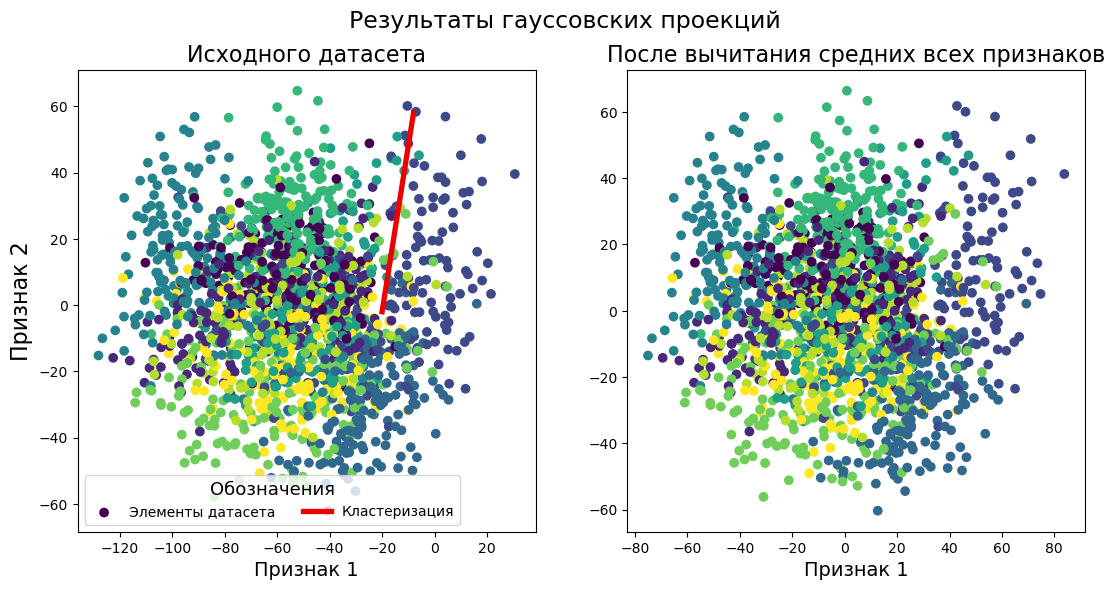

In [67]:
from sklearn.random_projection import GaussianRandomProjection
print("Давайте попробуем сделать регрессию случайными гауссовскими проекциий до размерности 2 исходного датасета и датасета, где из всех признаков вычтено среднее арифметическое.")
dim2_gauss_transformer = GaussianRandomProjection(n_components = 2, random_state=42)
dim_2_dataset = dim2_gauss_transformer.fit_transform(digits.data)
dim_2_differed_dataset = dim2_gauss_transformer.fit_transform(mean_differed_digits)

plt.figure(figsize=(13, 6))
plt.suptitle("Результаты гауссовских проекций", fontsize = 17)

plt.subplot(1, 2, 1)
plt.title('Исходного датасета', fontsize = 16)
plt.scatter(x = dim_2_dataset[:, [0]], y = dim_2_dataset[:, [1]], c = digits.target)
plt.xlabel('Признак 1', fontsize=14)
plt.ylabel('Признак 2', fontsize=16)

clasterisation_func = np.poly1d([5, 98])
line_graph_x = np.linspace(-20, -8, 50)
plt.plot(line_graph_x, clasterisation_func(line_graph_x), c = "#ee0000", linewidth=3.8, linestyle = "-")
plt.legend(title='Обозначения', labels = ["Элементы датасета", "Кластеризация"], title_fontsize=13, fontsize=10, ncol=2, loc='lower left')

plt.subplot(1, 2, 2)
plt.title('После вычитания средних всех признаков', fontsize = 16)
plt.scatter(x = dim_2_differed_dataset[:, [0]], y = dim_2_differed_dataset[:, [1]], c = digits.target)
plt.xlabel('Признак 1', fontsize=14)

plt.show()


Выводы:
1) На низких значениях ранга случайная гауссовская проекция дает результаты, качественно отличающиеся от применения SVD-разложения: в то время как SVD-разложение позволило выделить множество сегментов, при гауссовских проекциях достаточно четко отделился только один, не выделявшийся при SVD. В целом, по сравнению с использованием SVD, в такой вариации этот метод явно проигрывает.
2) Гипотеза: в отличие от SVD-разложения, метод случайных гауссовских проеобразований не чувствителен к линейным сдвигам признаков(вычитание среднего арифметического всех признаков не повлияло на график).


А что если попробовать комбинировать SVD и случайные гауссовские проекции? 
Сделаем еще 4 опыта, чтобы проверить гипотезу п.2: 
1) Попробуем уменьшить размерность с помощью гауссовской проекции до относительно высокой размерности, а затем сжать полученные данные до размерности 2 с помощью SVD.
2) Вычтем из данных средние арифметические всех признаков, после чего применим шаги первого.

Смысл первых двух опытов - убедиться, что устойчивость к сдвигам не зависит от размерности гауссовских проекций.

3) Вычтем из матрицы данных матрицу с одинаковыми по столбцам шумовыми значениями, после чего сожмем ее до размерности 2 случайными гауссовскими проекциями.
4) Вычтем из матрицы данных матрицу с другими одинаковыми по столбцам шумовыми значениями, после чего сожмем ее до размерности 2 случайными гауссовскими проекциями.

Смысл последних опытов - проверить, что гипотеза выполняется не только при вычитании средних из столбцов, а вообще любых значений.

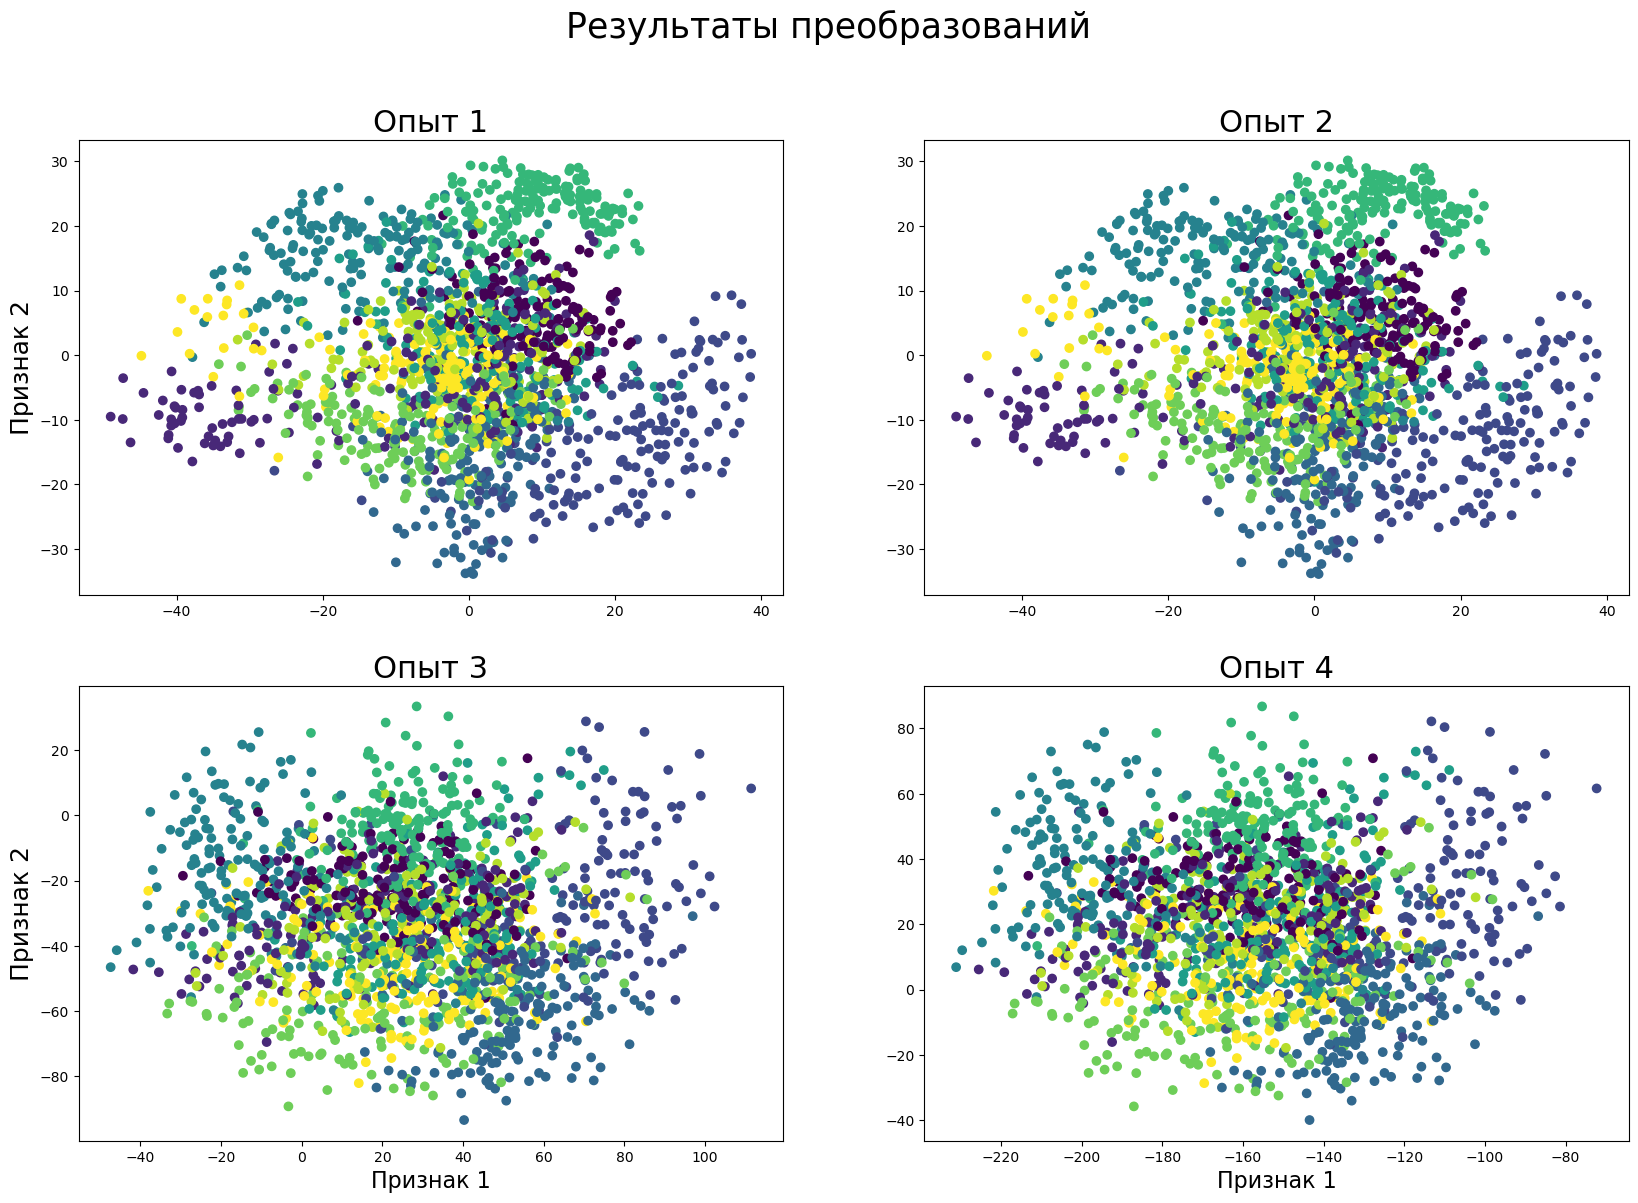

In [64]:
highdim_gauss_transformer = GaussianRandomProjection(n_components = 40, random_state=42)

def apply_diff_SVD(data, dim = 2):
    feature_means_matrix = np.repeat(np.mean(data, axis = 0)[np.newaxis], data.shape[0], axis = 0)
    mean_differed_data = data - feature_means_matrix
    U, S, VT = svd(mean_differed_data, full_matrices=False)
    return U@np.diag(S)[:, :dim]

plt.figure(figsize=(20, 13))
nodiff_SVD_gauss = apply_diff_SVD(highdim_gauss_transformer.fit_transform(digits.data))
diff_SVD_gauss = apply_diff_SVD(highdim_gauss_transformer.fit_transform(mean_differed_digits))
plt.suptitle("Результаты преобразований", fontsize = 25)

plt.subplot(2, 2, 1)
plt.title('Опыт 1', fontsize = 22)
plt.scatter(x = nodiff_SVD_gauss[:, [0]], y = nodiff_SVD_gauss[:, [1]], c = digits.target)
plt.ylabel('Признак 2', fontsize=18)

plt.subplot(2, 2, 2)
plt.title('Опыт 2', fontsize = 22)
plt.scatter(x = diff_SVD_gauss[:, [0]], y = diff_SVD_gauss[:, [1]], c = digits.target)

buzz_1_matrix = np.repeat((np.random.rand(digits.data.shape[1])*20)[np.newaxis], digits.data.shape[0], axis = 0)
buzz_1_gauss = dim2_gauss_transformer.fit_transform(digits.data - buzz_1_matrix)

buzz_2_matrix = np.repeat((np.random.rand(digits.data.shape[1])*20)[np.newaxis], digits.data.shape[0], axis = 0)
buzz_2_gauss = dim2_gauss_transformer.fit_transform(digits.data + buzz_2_matrix)

plt.subplot(2, 2, 3)
plt.title('Опыт 3', fontsize = 22)
plt.scatter(x = buzz_1_gauss[:, [0]], y = buzz_1_gauss[:, [1]], c = digits.target)
plt.xlabel('Признак 1', fontsize=16)
plt.ylabel('Признак 2', fontsize=18)

plt.subplot(2, 2, 4)
plt.title('Опыт 4', fontsize = 22)
plt.scatter(x = buzz_2_gauss[:, [0]], y = buzz_2_gauss[:, [1]], c = digits.target)
plt.xlabel('Признак 1', fontsize=16)

plt.show()


Гипотеза подтвердилась! График просто параллельно переносится! Это вполне логично, т. к. основная цель гауссовских проекций - приблизительно сохрнаять расстояние между точками, на что переносы всех точек вдоль плоскости никак не влияют. 

Заметим, что когда мы делали опыты, снижая размерность матриц до 44 с помощью случайных гауссовских проекторов, а затем действовали на них SVD, то по отделимости кластеров результат получался хуже, чем при простом применении SVD. А что, если нам не повезло с размерностью? Попробуем пошевелить ее:

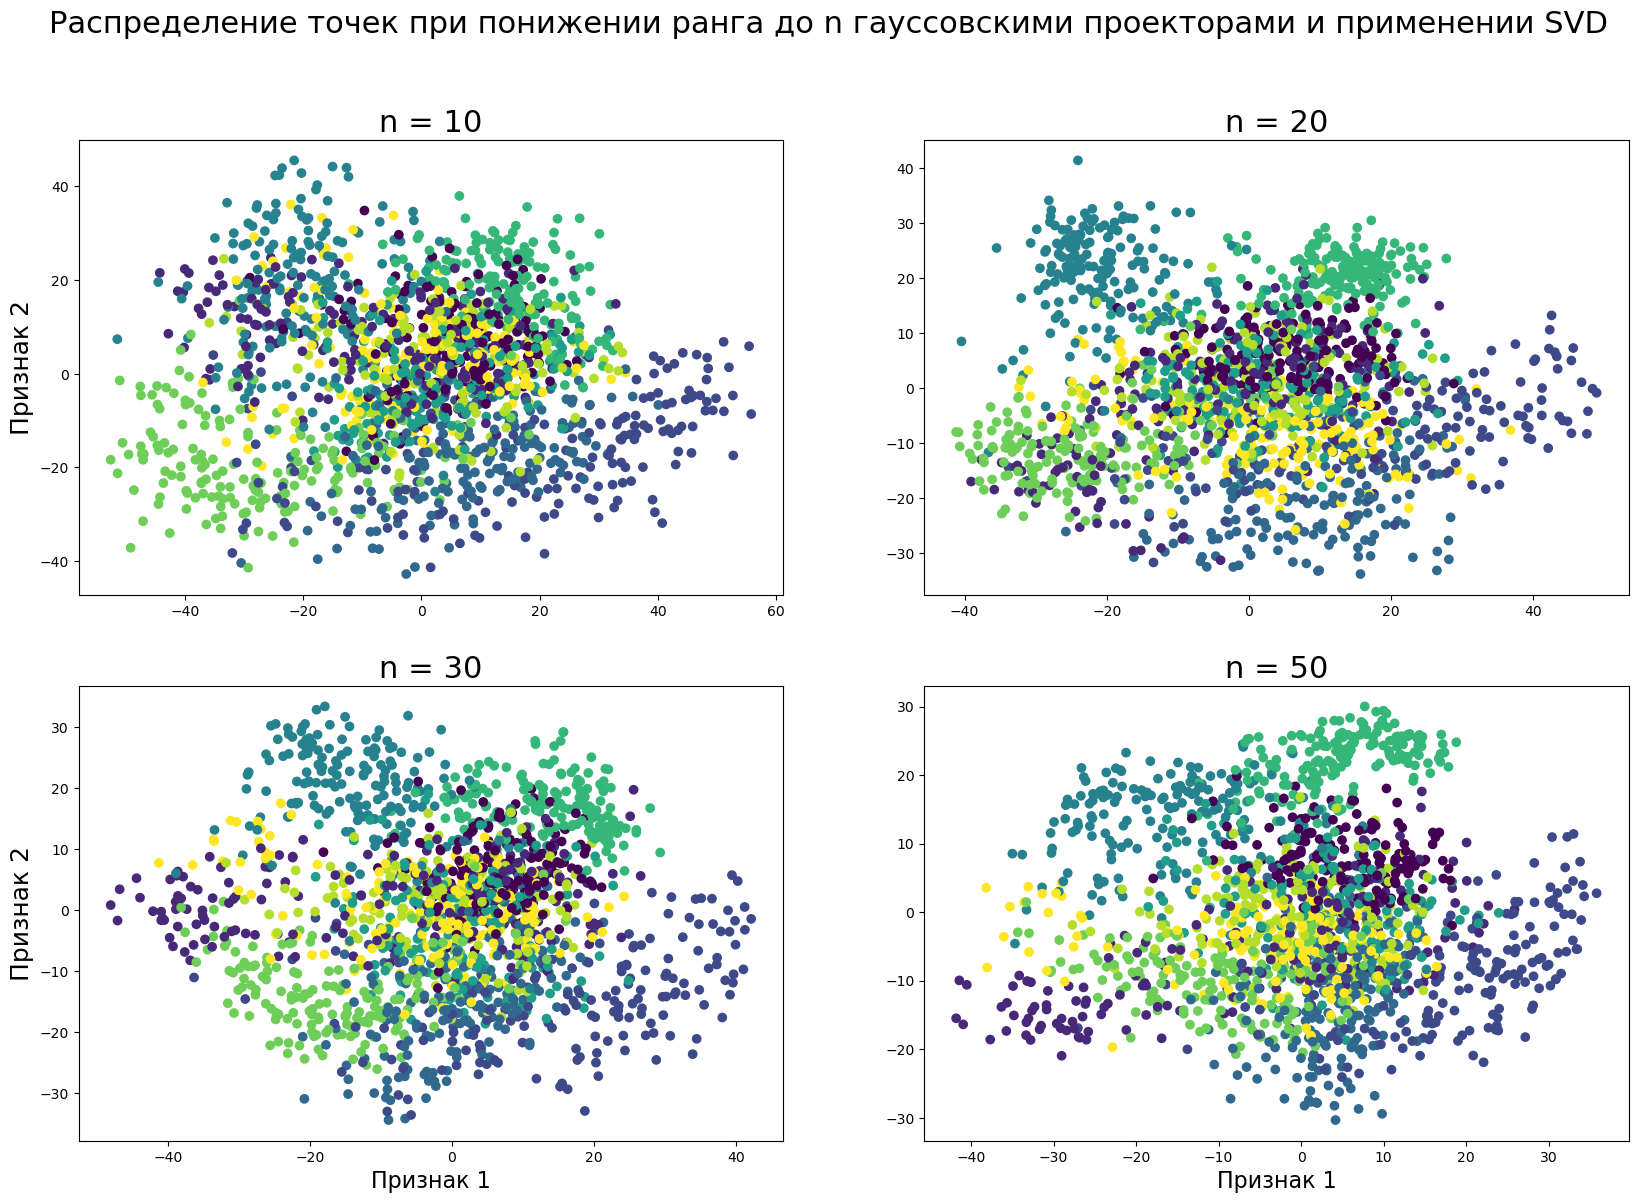

In [43]:
dim10_gauss_transformer = GaussianRandomProjection(n_components = 10, random_state=42)
dim20_gauss_transformer = GaussianRandomProjection(n_components = 20, random_state=42)
dim30_gauss_transformer = GaussianRandomProjection(n_components = 30, random_state=42)
dim50_gauss_transformer = GaussianRandomProjection(n_components = 50, random_state=42)

plt.figure(figsize=(20, 13))
dim10_SVD_gauss = apply_diff_SVD(dim10_gauss_transformer.fit_transform(digits.data))
dim20_SVD_gauss = apply_diff_SVD(dim20_gauss_transformer.fit_transform(digits.data))
dim30_SVD_gauss = apply_diff_SVD(dim30_gauss_transformer.fit_transform(digits.data))
dim50_SVD_gauss = apply_diff_SVD(dim50_gauss_transformer.fit_transform(digits.data))

plt.suptitle("Распределение точек при понижении ранга до n гауссовскими проекторами и применении SVD", fontsize = 22)

plt.subplot(2, 2, 1)
plt.title('n = 10', fontsize = 22)
plt.scatter(x = dim10_SVD_gauss[:, [0]], y = dim10_SVD_gauss[:, [1]], c = digits.target)
plt.ylabel('Признак 2', fontsize=18)

plt.subplot(2, 2, 2)
plt.title('n = 20', fontsize = 22)
plt.scatter(x = dim20_SVD_gauss[:, [0]], y = dim20_SVD_gauss[:, [1]], c = digits.target)

plt.subplot(2, 2, 3)
plt.title('n = 30', fontsize = 22)
plt.scatter(x = dim30_SVD_gauss[:, [0]], y = dim30_SVD_gauss[:, [1]], c = digits.target)
plt.xlabel('Признак 1', fontsize=16)
plt.ylabel('Признак 2', fontsize=18)

plt.subplot(2, 2, 4)
plt.title('n = 50', fontsize = 22)
plt.scatter(x = dim50_SVD_gauss[:, [0]], y = dim50_SVD_gauss[:, [1]], c = digits.target)
plt.xlabel('Признак 1', fontsize=16)

plt.show()

Очень интересно, что оптимальные n для кластеризации каждой цифры разнятся: например, при n = 20 наиболее четко обособлен бирюзовый кластер, а изумрудно-зеленый сливается с другими, а при n = 50 - наоборот.

Однако, в целом, такой подход неэффективен: обособляются только те кластеры, которые хорошо отделялись и при использовании только SVD/Гауссовских проекций. Действительно, выделять признаки с наибольшей дисперсией на низкоранговом приближении датасета не несет особого смысла по сравнению с выделением их на исходном датасете(низкоранговость приближения нам никак не помогает).

Но ничто не мешает нам попробовать сначала применять SVD, а уже после него - гауссовские проекции?
Такая последовательность применений более осмысленна: мы сначала выделяем новые признаки в ортогональных плоскостях(чтобы они
были независимы), дисперсия по которым наибольшая, а затем пытаемся спроецировать новые координаты признаков на R^2.
При этом имеет смысл рассматривать только маленькие n: сингулярные числа, а, значит, и дисперсии все новых признаков будут убывать очень быстро, а вторичные признаки будут сильно портить качество регрессии гауссовскими проекциями.

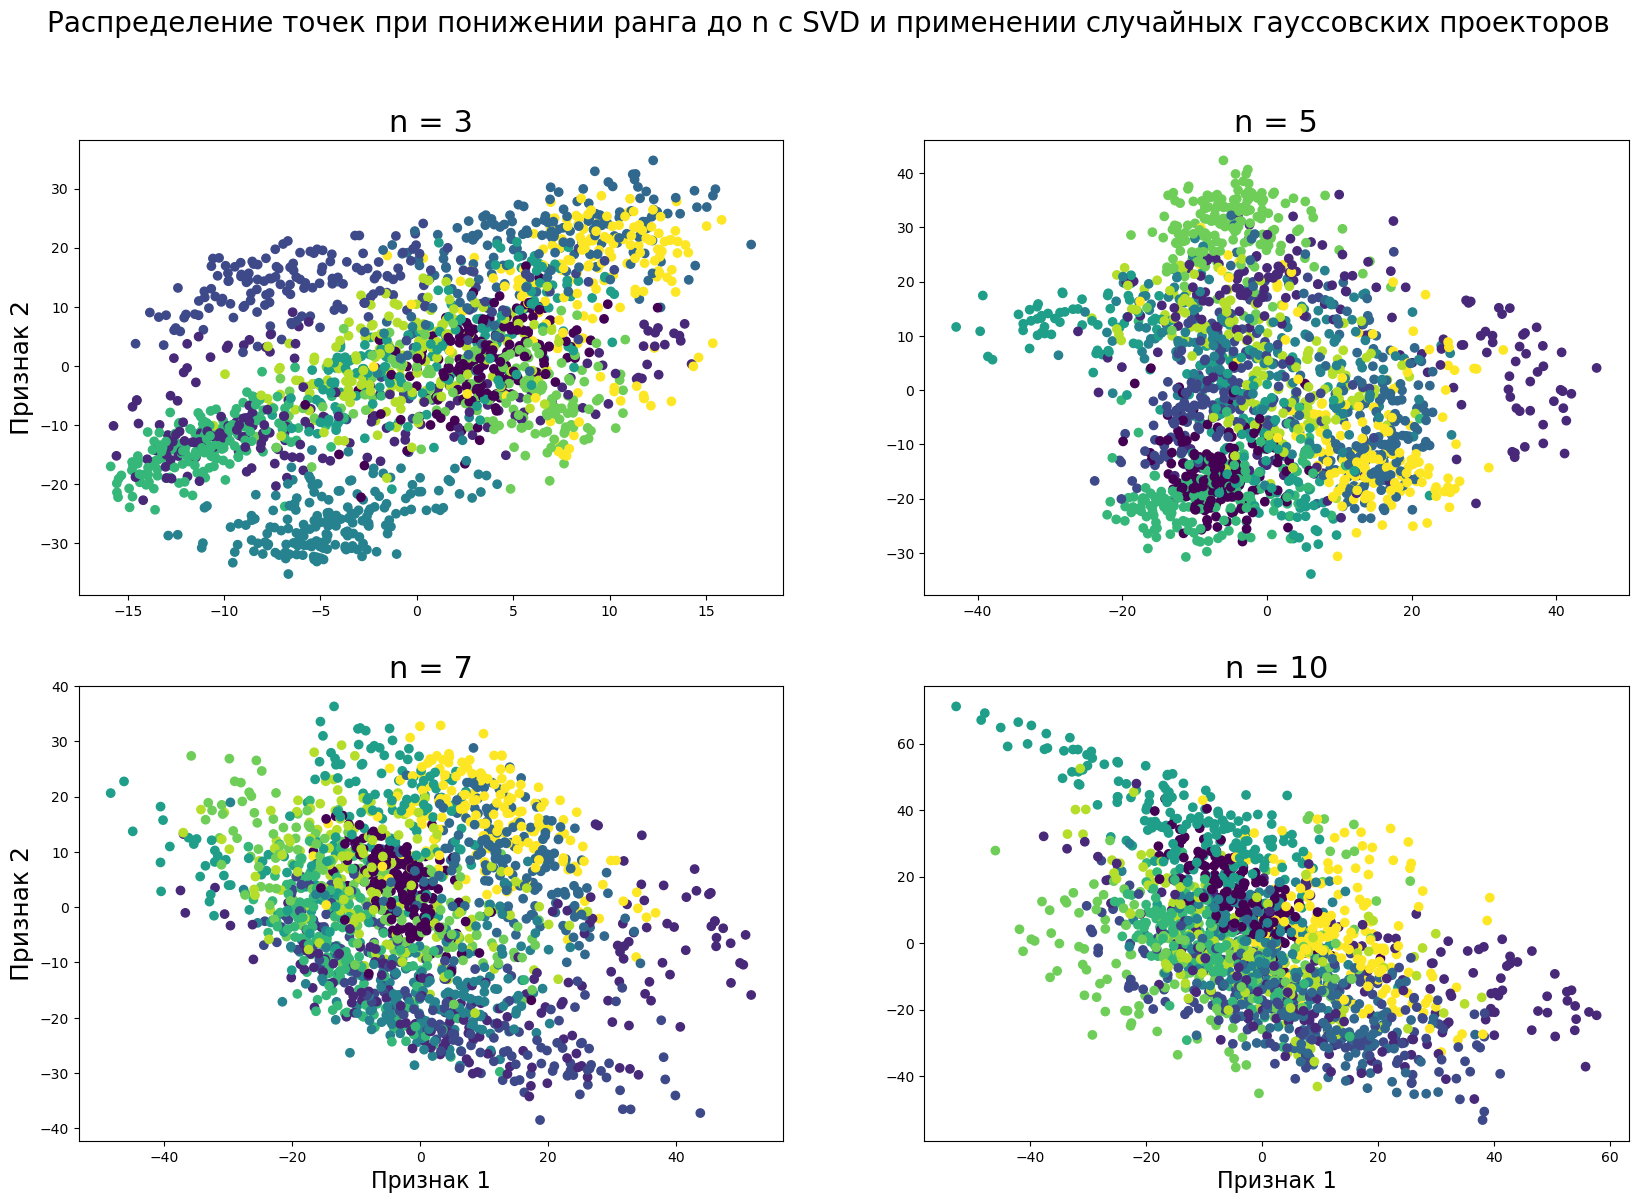

In [177]:
plt.figure(figsize=(20, 13))
dim3_gauss_SVD = dim2_gauss_transformer.fit_transform(apply_diff_SVD(digits.data, 3))
dim5_gauss_SVD = dim2_gauss_transformer.fit_transform(apply_diff_SVD(digits.data, 5))
dim7_gauss_SVD = dim2_gauss_transformer.fit_transform(apply_diff_SVD(digits.data, 7))
dim10_gauss_SVD = dim2_gauss_transformer.fit_transform(apply_diff_SVD(digits.data, 10))

plt.suptitle("Распределение точек при понижении ранга до n с SVD и применении случайных гауссовских проекторов", fontsize = 20)

plt.subplot(2, 2, 1)
plt.title('n = 3', fontsize = 22)
plt.scatter(x = dim3_gauss_SVD[:, [0]], y = dim3_gauss_SVD[:, [1]], c = digits.target)
plt.ylabel('Признак 2', fontsize=18)

plt.subplot(2, 2, 2)
plt.title('n = 5', fontsize = 22)
plt.scatter(x = dim5_gauss_SVD[:, [0]], y = dim5_gauss_SVD[:, [1]], c = digits.target)

plt.subplot(2, 2, 3)
plt.title('n = 7', fontsize = 22)
plt.scatter(x = dim7_gauss_SVD[:, [0]], y = dim7_gauss_SVD[:, [1]], c = digits.target)
plt.xlabel('Признак 1', fontsize=16)
plt.ylabel('Признак 2', fontsize=18)

plt.subplot(2, 2, 4)
plt.title('n = 10', fontsize = 22)
plt.scatter(x = dim10_gauss_SVD[:, [0]], y = dim10_gauss_SVD[:, [1]], c = digits.target)
plt.xlabel('Признак 1', fontsize=16)

plt.show()

Результаты отличные: при n = 3 прекрасно обособились классы двух цифр, но самое главное, при n = 5 мы смогли относительно обособить от остальных класс цифр, соответствующий зеленым точкам в верхней части изображения(ни SVD, ни гауссовские проекторы по отдельности не могли это сделать).
Наше предположение о о том, что рассматривать стоит только малые n из-за ухудшения точности случайных гауссовских проекций подтвердилось: при n = 7 ни один класс обособить не получается, хотя можно выделить 2 кластера цифр, при n = 10 точки всех классов абсолютно перемешались.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [14]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

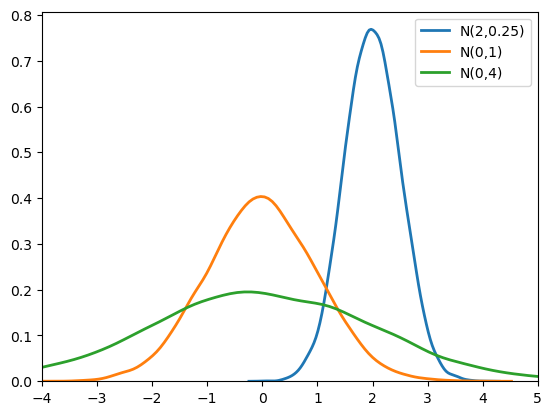

In [15]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<Axes: >

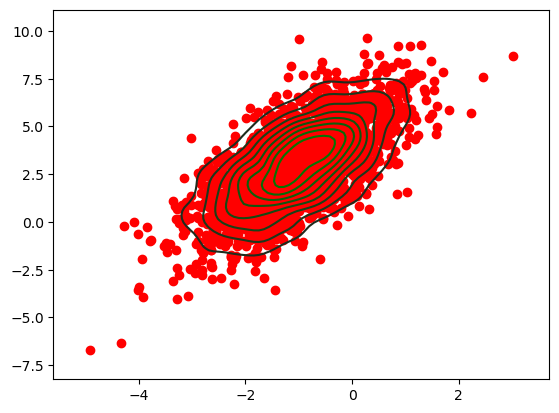

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

<Axes: >

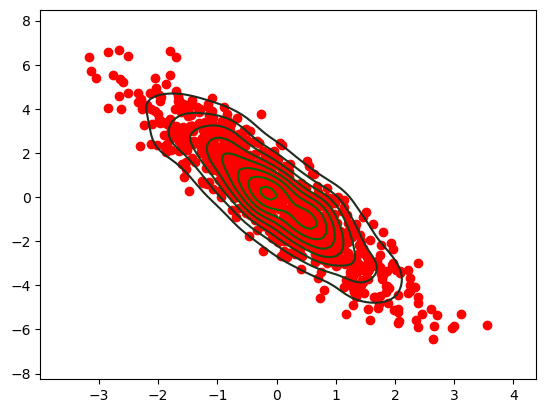

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

X = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.array([[1, -2],[-2, 5]]), size=1000)
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(X, shade=False, color='g')

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

<Axes: >

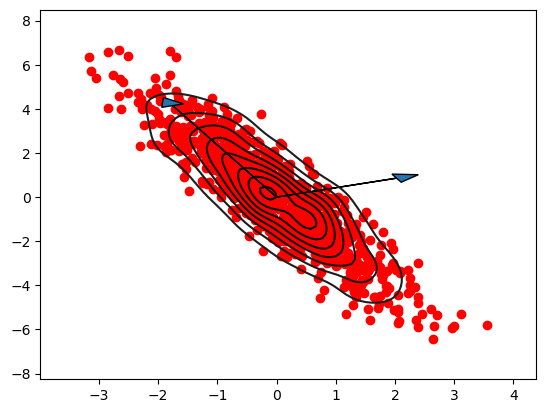

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

U, S, VT = svd(X, full_matrices=False)
plt.scatter(X[:,0], X[:,1], color='red')

vector1_norm = 4.5 
vector2_norm = 2.2

plt.arrow(0, 0, vector1_norm*VT[0][0], vector1_norm*VT[0][1], head_width=0.4, head_length=0.4)
plt.arrow(0, 0, vector2_norm*VT[1][0], vector2_norm*VT[1][1], head_width=0.4, head_length=0.4)

sns.kdeplot(X, shade=False, color='black')

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

https://drive.google.com/file/d/1XEBtywZ8IW3P2XDdIvhp7N8mJ2Ql-zJ4/view?usp=sharing

Изобразим найденные векторы

<Axes: >

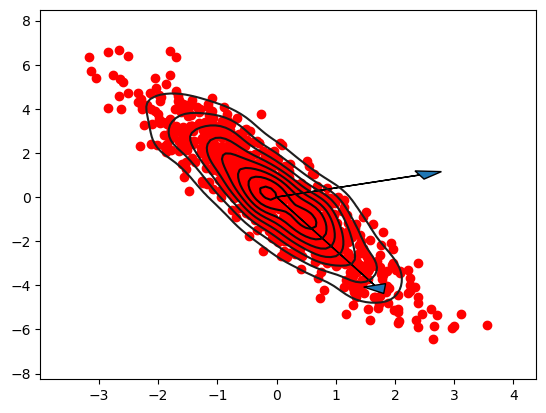

In [47]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

v1 = [2**0.5 + 1, 1]
v2 = [2**0.5 - 1, -1]
plt.scatter(X[:,0], X[:,1], color='red')

vector1_norm = 1
vector2_norm = 4

plt.arrow(0, 0, vector1_norm*v1[0], vector1_norm*v1[1], head_width=0.4, head_length=0.4)
plt.arrow(0, 0, vector2_norm*v2[0], vector2_norm*v2[1], head_width=0.4, head_length=0.4)

sns.kdeplot(X, shade=False, color='black')

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

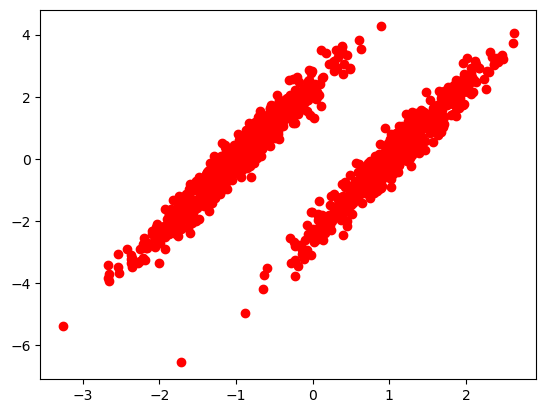

In [48]:
covariation_matrix = ([[0.42, 1], [1, 2.5]])
first_pack = np.random.multivariate_normal(mean=np.array([-1, 0]), cov=covariation_matrix, size=600)
second_pack = np.random.multivariate_normal(mean=np.array([1, 0]), cov=covariation_matrix, size=600)

total_set = np.concatenate((first_pack, second_pack))
plt.scatter(total_set[:,0], total_set[:,1], color='red')

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

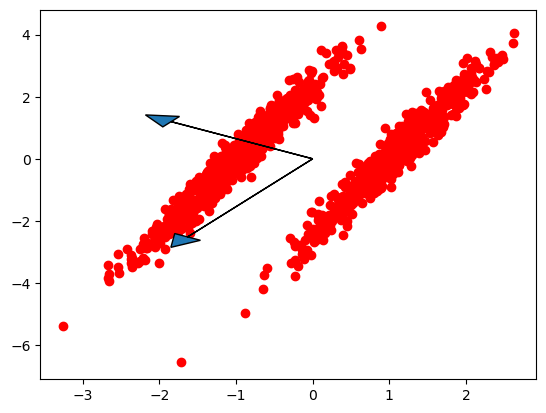

In [49]:
U, S, VT = svd(total_set, full_matrices=False)

plt.scatter(total_set[:,0], total_set[:,1], color='red')
vector1_norm = 3
vector2_norm = 2.2

plt.arrow(0, 0, vector1_norm*VT[0][0], vector1_norm*VT[0][1], head_width=0.4, head_length=0.4)
plt.arrow(0, 0, vector2_norm*VT[1][0], vector2_norm*VT[1][1], head_width=0.4, head_length=0.4)

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Помогает признак, вектор которого параллелен большим полуосям эллипса(индикатор), разбивающий плоскость на 2 части, в каждой из которых лежит 1 кластер точек. Это совпадение двух удачных обсоятельств: 
1) совпадение матриц ковариации. 
2) среднее значение всех точек = (0, 0).
За счет этого индикатор, выделяемый SVD(ортогональный вектор, вдоль которого дисперсия относительно всех точек максимальна (тут мы пользуемся свойством $(1)$, что эллипсоиды устроены одинаково) если среднее значение признака - 0(помогает свойство 2)) оказывается вектором, направленным параллельно большим полуосям каждого эллипсоида и лежащим между ними

Если мы заменим значение среднего вектора или матрицу ковариации у одного из наборов точек, чтобы устранить эти совпадения, то SVD сработает некорректно.

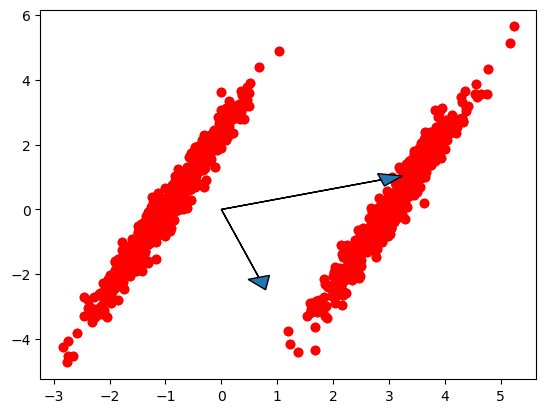

In [50]:
first_pack = np.random.multivariate_normal(mean=np.array([-1, 0]), cov=covariation_matrix, size=600)
second_pack = np.random.multivariate_normal(mean=np.array([3, 0]), cov=covariation_matrix, size=600)
total_set = np.concatenate((first_pack, second_pack))

U, S, VT = svd(total_set, full_matrices=False)

plt.scatter(total_set[:,0], total_set[:,1], color='red')
plt.scatter(total_set[:,0], total_set[:,1], color='red')
vector1_norm = 3
vector2_norm = 2.2

plt.arrow(0, 0, vector1_norm*VT[0][0], vector1_norm*VT[0][1], head_width=0.4, head_length=0.4)
plt.arrow(0, 0, vector2_norm*VT[1][0], vector2_norm*VT[1][1], head_width=0.4, head_length=0.4)

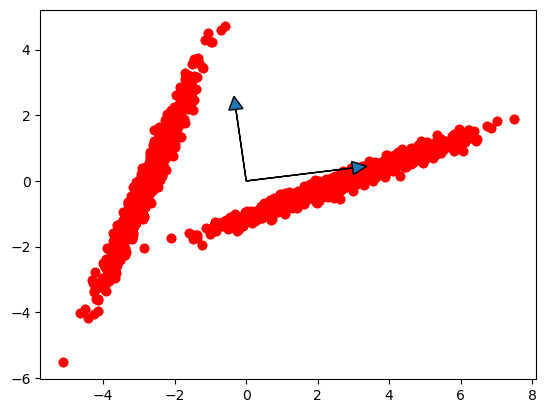

In [36]:
first_pack = np.random.multivariate_normal(mean=np.array([-2.75, 0]), cov=covariation_matrix, size=800)
second_pack = np.random.multivariate_normal(mean=np.array([2.75, 0]), cov=([[2.5, 1], [1, 0.42]]), size=800)
total_set = np.concatenate((first_pack, second_pack))

U, S, VT = svd(total_set, full_matrices=False)

plt.scatter(total_set[:,0], total_set[:,1], color='red')
plt.scatter(total_set[:,0], total_set[:,1], color='red')
vector1_norm = 3
vector2_norm = 2.2

plt.arrow(0, 0, vector1_norm*VT[0][0], vector1_norm*VT[0][1], head_width=0.4, head_length=0.4)
plt.arrow(0, 0, vector2_norm*VT[1][0], vector2_norm*VT[1][1], head_width=0.4, head_length=0.4)

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

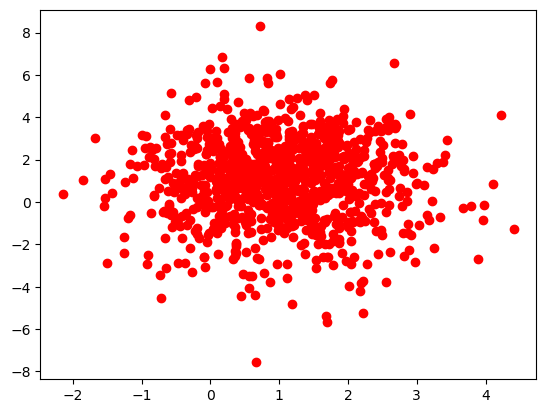

In [65]:
covariation_matrix = ([[1, 0], [0, 4]])
points_set = np.random.multivariate_normal(mean=np.array([1, 1]), cov=covariation_matrix, size=1000)

plt.scatter(points_set[:,0], points_set[:,1], color='red')

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Направления полуосей эллипсоида соответствуют направлениям главных осей матрицы ковариации, которые, как было показано в задании 3.3 являются собственными векторами матрицы ковариации.

Поэтому, в нашем случае искомыми направлениями будут собственные векторы Σ: (1, 0) и (0, 1)

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

/Users/a1/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


<Axes: >

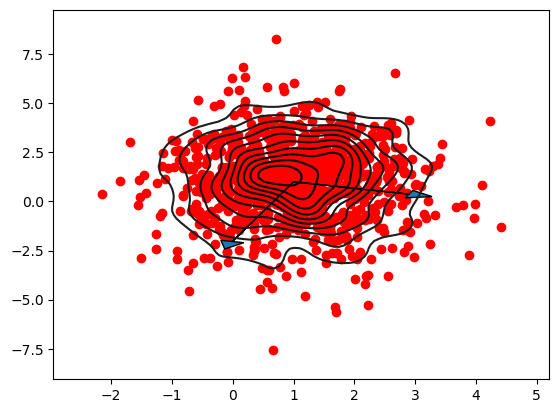

In [66]:

plt.scatter(points_set[:,0], points_set[:,1], color='red')
U, S, VT = svd(points_set, full_matrices=False)

vector1_norm = 3.2
vector2_norm = 2

plt.arrow(1, 1, vector1_norm*VT[0][0], vector1_norm*VT[0][1], head_width=0.4, head_length=0.4)
plt.arrow(1, 1, vector2_norm*VT[1][0], vector2_norm*VT[1][1], head_width=0.4, head_length=0.4)
sns.kdeplot(points_set, shade=False, color='black')

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

Проблема состоит в том, что направление полученного с помощью SVD вектора, который должен соответствовать вертикальной полуоси эллипса, отклонено(в коде этот вектор соответствует VT[0]).
Это явление вызвано тем, что SVD выявляет признаки, вдоль которых максимальна дисперсия без учета среднего вектора: $|Xw|^2$, а не настоящая дисперсия: $|Xw - \overline{Xw}|^2$ ($\overline{Xw}$ - вектор из одинаковых чисел - среднего значения соответствующего признака), и ненулевой средний вектор признаков вносит помехи.

Мы уже наблюдали это явление в заданиях 2.5-2.8 где после вычитания среднего значения признаков качество кластеризации резко улучшилось. 

Так вычтем из всех точек (1, 1)(среднее значение), чтобы их среднее значение координат было (0, 0) - тогда SVD сработает корректно.

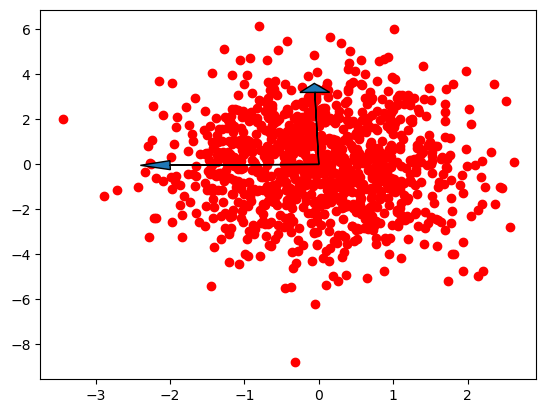

In [54]:
means_matrix = np.repeat(np.array([1, 1])[np.newaxis], 1000, axis = 0)
zero_centre_points_set = points_set - means_matrix
plt.scatter(zero_centre_points_set[:,0], zero_centre_points_set[:,1], color='red')
U, S, VT = svd(zero_centre_points_set, full_matrices=False)

vector1_norm = 3.2
vector2_norm = 2

plt.arrow(0, 0, vector1_norm*VT[0][0], vector1_norm*VT[0][1], head_width=0.4, head_length=0.4)
plt.arrow(0, 0, vector2_norm*VT[1][0], vector2_norm*VT[1][1], head_width=0.4, head_length=0.4)